# Facebook Stocks

### Loading Packages:

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe['Open-Close'] = FB_dataframe.Open - FB_dataframe.Close
FB_dataframe['High-Low'] = FB_dataframe.High - FB_dataframe.Low
FB_dataframe = FB_dataframe.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [9]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close_x']

In [11]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Close'] = temp['Close_x']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Close'] = temp['Close_x']

In [12]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']

In [13]:
#Datetime
FB_dataframe.dropna(inplace=True)
FB_dataframe['ordinal'] = FB_dataframe['Date'].apply(lambda x: x.toordinal())

FB_dataframe

,Date,Close,Open-Close,High-Low,FB MAU (millions),TWTR Close,SNAP Close,Apple Close,Google Close,FB Net Income (millions),FB Lobbying (millions),ordinal
0,2012-05-18,38.230000,3.820000,7.000000,955,38.230000,38.230000,38.230000,38.230000,-157,0.96,734641
1,2012-05-21,34.029999,2.500000,3.660000,955,34.029999,34.029999,34.029999,34.029999,-157,0.96,734644
2,2012-05-22,31.000000,1.610001,2.650000,955,31.000000,31.000000,31.000000,31.000000,-157,0.96,734645
3,2012-05-23,32.000000,-0.629999,1.139999,955,32.000000,32.000000,32.000000,32.000000,-157,0.96,734646
4,2012-05-24,33.029999,-0.079998,1.439999,955,33.029999,33.029999,33.029999,33.029999,-157,0.96,734647
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,2021-09-27,353.579987,-3.769989,8.070007,2910,353.579987,353.579987,353.579987,353.579987,9194,5.09,738060
2355,2021-09-28,340.649994,7.320007,10.679993,2910,340.649994,340.649994,340.649994,340.649994,9194,5.09,738061
2356,2021-09-29,339.609985,3.540009,6.350006,2910,339.609985,339.609985,339.609985,339.609985,9194,5.09,738062
2357,2021-09-30,339.390015,1.059998,4.649994,2910,339.390015,339.390015,339.390015,339.390015,9194,5.09,738063


### Basic Plots

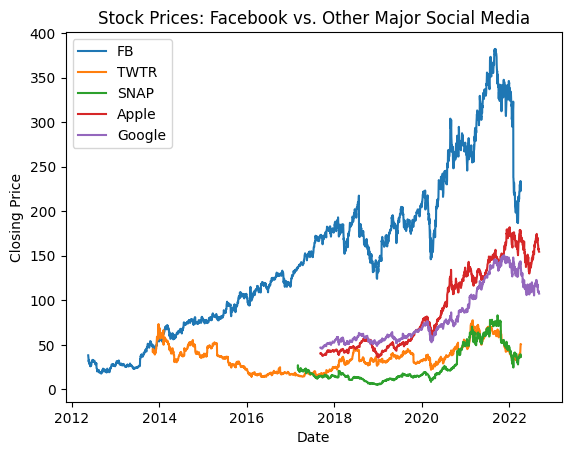

In [14]:
# Closing prices of Facebook vs Other Companies (2012-2022)
copanies = ['FB', 'TWTR', 'SNAP']
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    plt.plot(company_df['Date'], company_df['Close'], label=company)
plt.plot(apple_dataframe['Date'], apple_dataframe['Close'], label='Apple')
plt.plot(google_dataframe['Date'], google_dataframe['Close'], label='Google')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

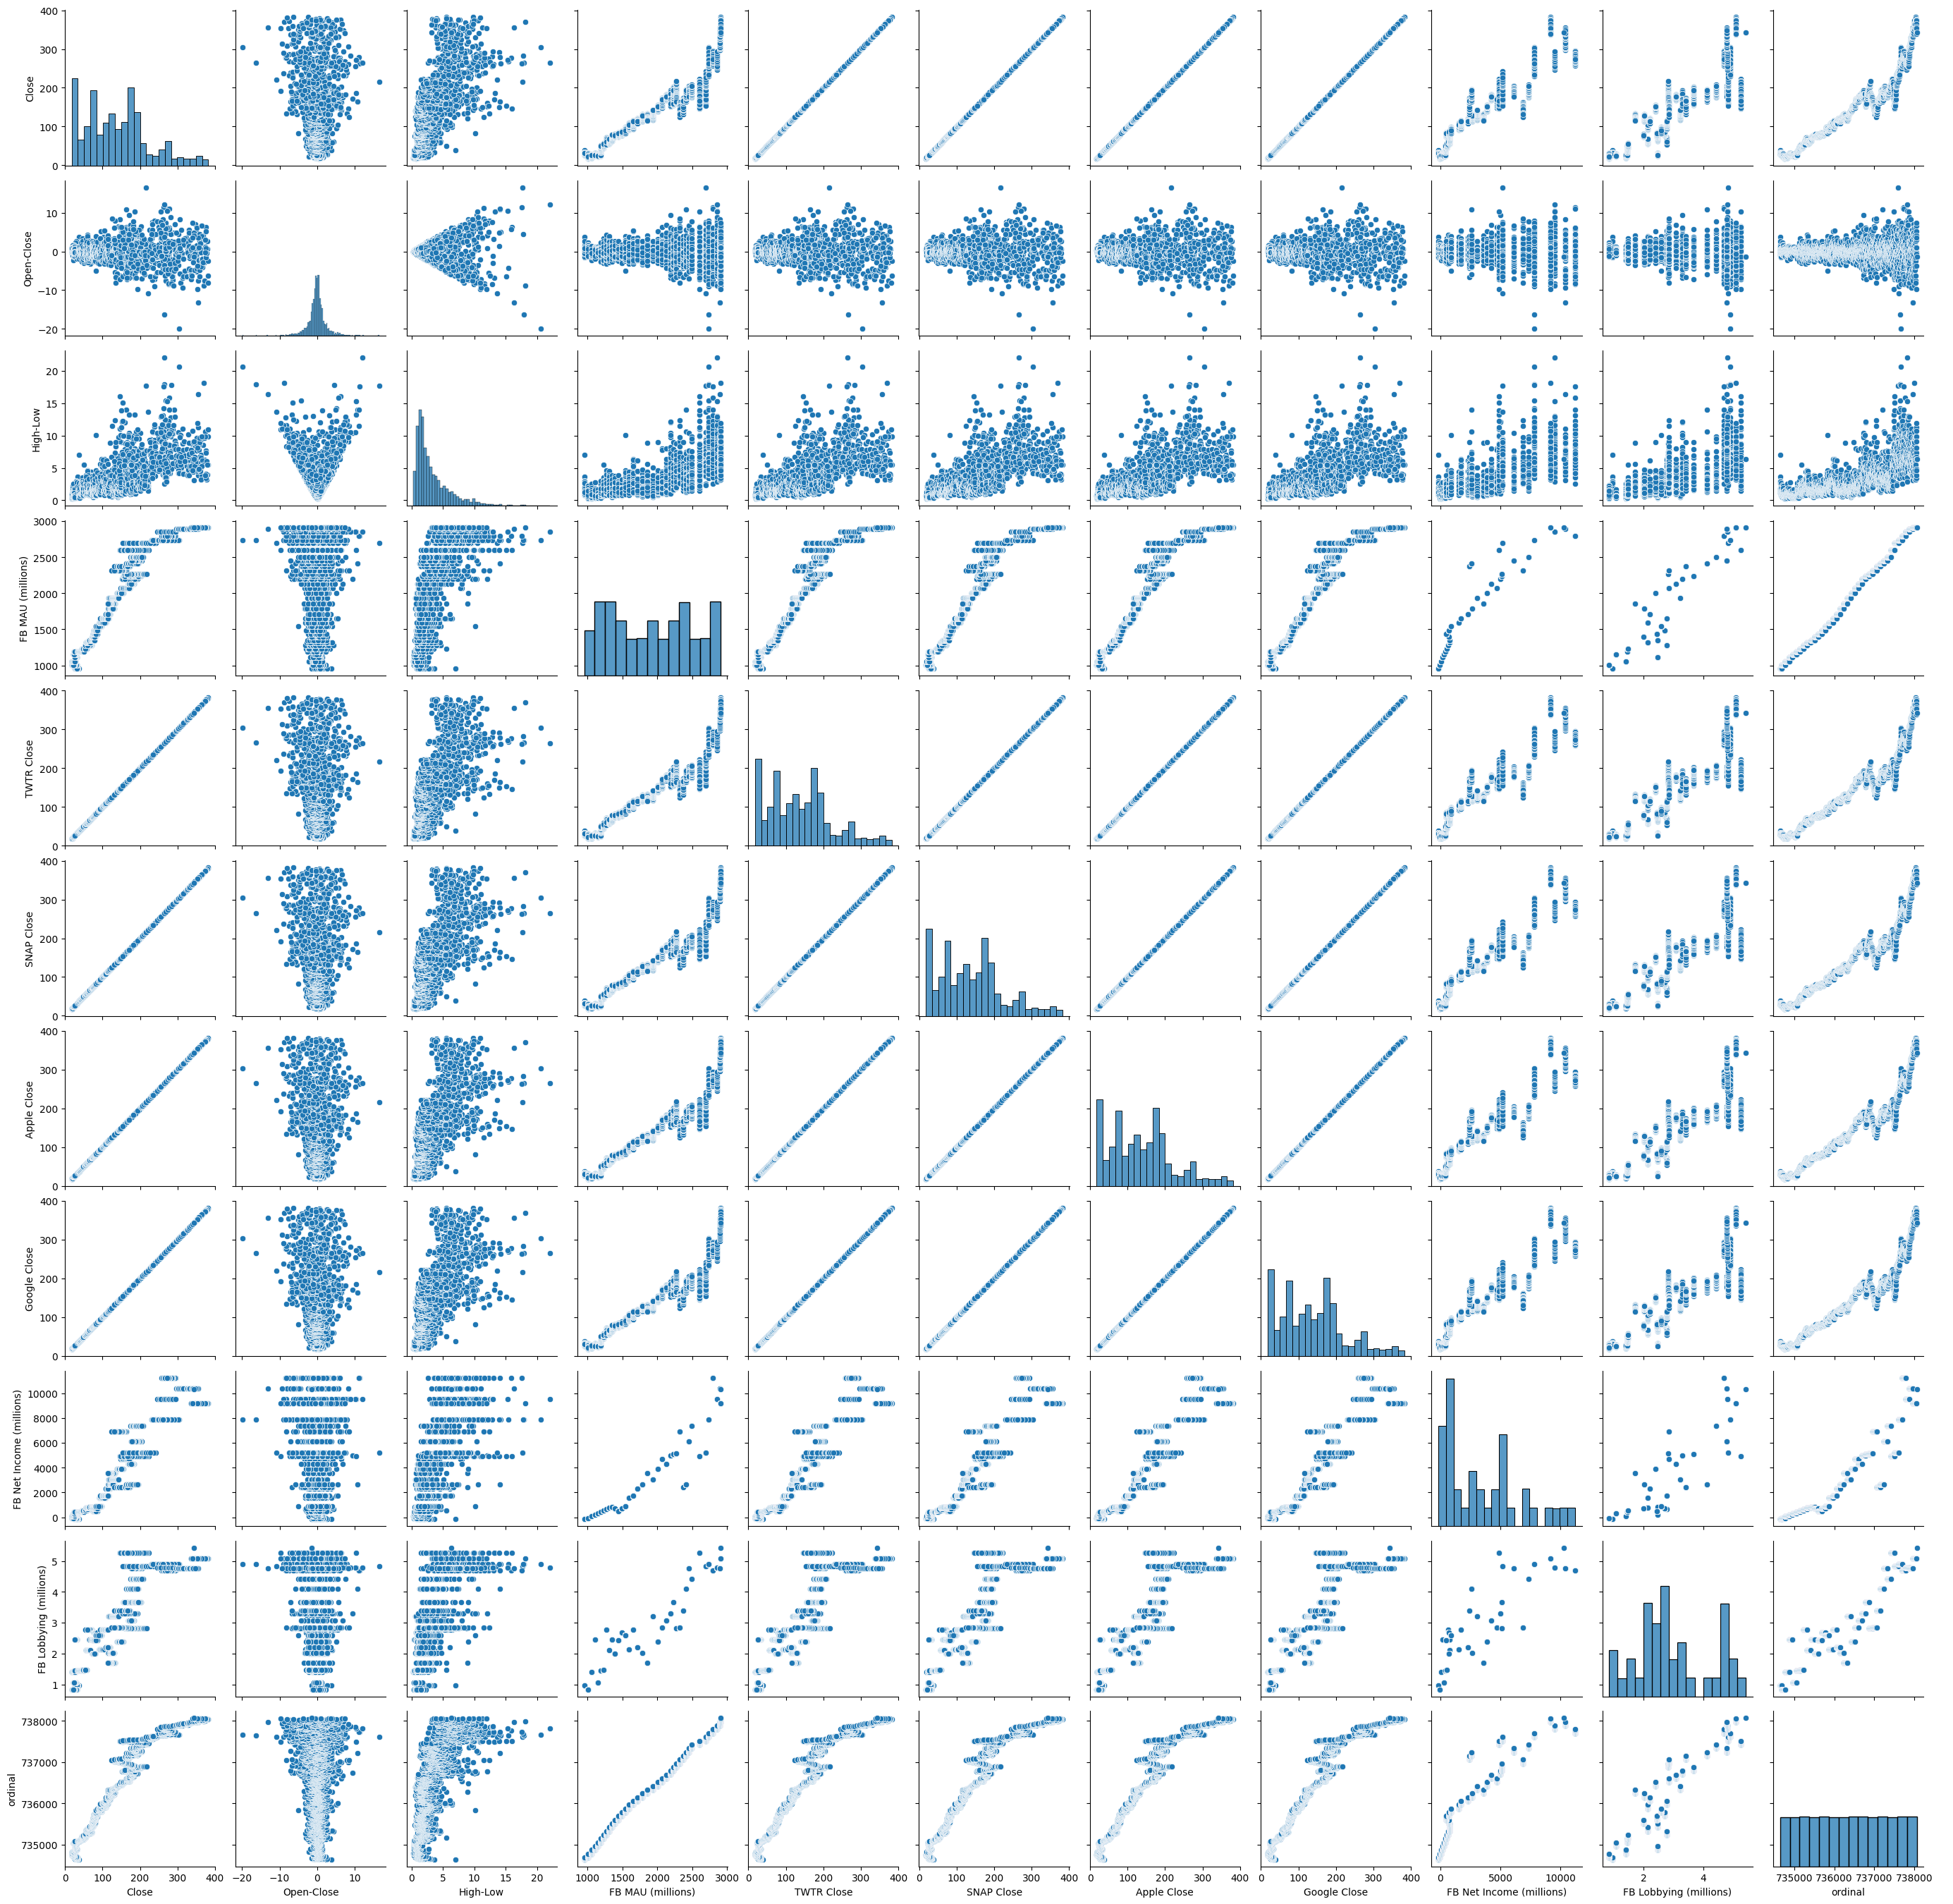

In [15]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Train Model and Predict

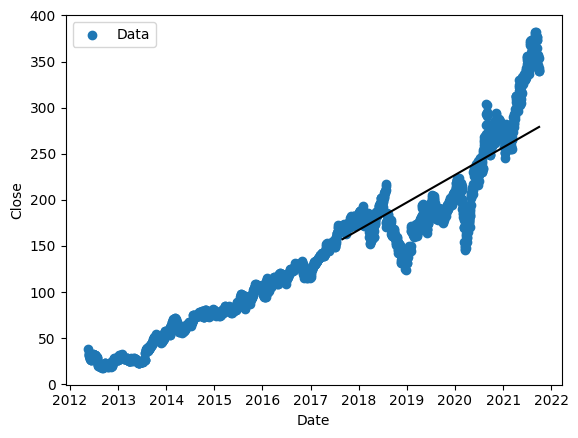

In [51]:
# Simple Linear Regression using FB Closing Price vs. Datetime
# (https://www.w3schools.com/python/python_ml_multiple_regression.asp)
from sklearn import linear_model
import datetime as dt

X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)
# plot data
fig, ax = plt.subplots()
ax.scatter(FB_dataframe['Date'], FB_dataframe['Close'], label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.legend()

# plot pred
date_range = pd.date_range(start='2017-08-31', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = regr.predict(ordinal_range.to_numpy().reshape(-1, 1))
ax.plot(date_range, y_pred, color='k')

plt.show()

In [ ]:
# Predicting Stock Price Direction using Support Vector Machines


In [56]:
# Predicting Stock Price Direction using Support Vector Machines
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the model using the training data
svr.fit(X_train.values, y_train.values)

# Make predictions on the test data
date_range = pd.date_range(start='2012-05-18', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = svr.predict(ordinal_range.to_numpy().reshape(-1, 1))

In [60]:
# Evaluate the performance of the model using mean squared error
y_pred = svr.predict(X_test.values)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  39.322804601626174


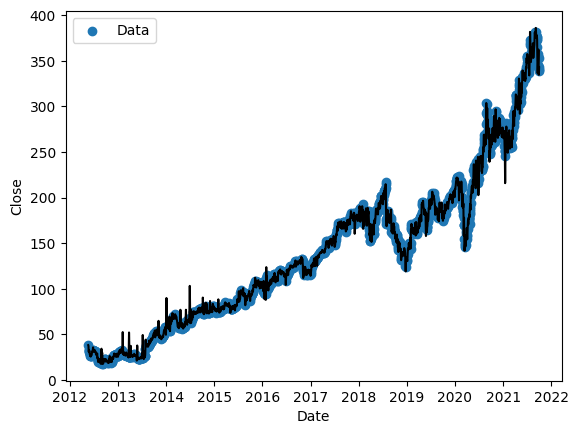

In [57]:
# plot data
fig, ax = plt.subplots()
ax.scatter(FB_dataframe['Date'], FB_dataframe['Close'], label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.legend()

ax.plot(date_range, y_pred, color='k')
plt.show()

### Evaluate Accuracy